In [64]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import os



def add_locant_labels(mol):
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp("atomLabel", str(chr(ord('A') + i)))
    return mol

def bond_via_locant(loc_1,loc_2,mol):
    atom_1 = 0
    atom_2 = 0
    for i, atom in enumerate(mol.GetAtoms()):
        label = atom.GetProp('atomLabel')
        if(loc_1 == label):
            atom_1 = atom
        elif(loc_2 == label):
            atom_2 = atom
            
    if(atom_1 == 0 or atom_2 == 0):
        print("Error: one or more atoms is not set")
        return False
    
    edit = Chem.EditableMol(mol)
    edit.AddBond(atom_1.GetIdx(),atom_2.GetIdx(),Chem.rdchem.BondType.SINGLE)
    
    return edit.GetMol()


def add_branch_locant(branch_locant,locant,mol):
    atom_1 = 0
    for i, atom in enumerate(mol.GetAtoms()):
        label = atom.GetProp('atomLabel')
        if(locant == label):
            atom_1 = atom
    
    if(atom_1 == 0):
        print("Error: one or more atoms is not set")
        return False
    
    
    edit = Chem.EditableMol(mol)
    new_idx = edit.AddAtom(Chem.Atom(6))
    edit.AddBond(new_idx,atom_1.GetIdx(),Chem.rdchem.BondType.SINGLE)
    
    mol = edit.GetMol()
    atom1 = mol.GetAtomWithIdx(new_idx)
    atom1.SetProp("atomLabel", branch_locant)
    return  mol

def save_mol_to_svg(mol, filename):
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)  # Specify the drawing size

    # Customize the drawing options if needed
    opts = drawer.drawOptions()
    opts.atomLabelFontFace = 'Arial'
    opts.atomLabelFontSize = 12

    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()

    svg = drawer.GetDrawingText()
    
    base_filename, extension = os.path.splitext(filename)
    new_filename = filename
    counter = 1

    while os.path.exists(new_filename):
        new_filename = f"{base_filename}_{counter}{extension}"
        counter += 1

    with open(new_filename, 'w') as file:
        file.write(svg)

    print("File saved as:", new_filename)

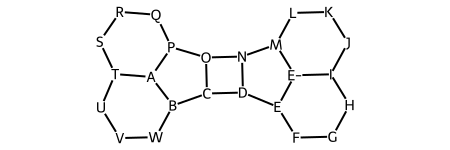

In [84]:
mol = Chem.MolFromSmiles("CCCCCCCCCCCCCCCCCCCCCCC")
add_locant_labels(mol)

mol = add_branch_locant('E-','E',mol)
mol = bond_via_locant('E-', 'I',mol)
mol = bond_via_locant('E-', 'M',mol)
mol = bond_via_locant('D','N',mol)
mol = bond_via_locant('O','C',mol)
mol = bond_via_locant('A','P',mol)
mol = bond_via_locant('A','T',mol)
mol = bond_via_locant('B','W',mol)
mol

In [85]:
if(mol):
    save_mol_to_svg(mol,"branched.svg")

File saved as: branched_7.svg
